### Adhlere Coffy
### PUI HW5 - Task 2
### October 20, 2015

In [72]:
#Import modules

import os
import sys
import json
import urllib2
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as scistat
import statsmodels.api as sm

s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'))
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
#Reading in the data via pandas excel. Put into a dictionary

url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"

allmales={}
allfemales={}

allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

In [9]:
from pandas.tools.plotting import scatter_matrix

#The excel files has non-real entries so you want to remove those first before you can actually 
#plot the information

#The for loop below goes through using isreal and removes the non-real values

for k in allmales:
    nonreal = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c] > 1 and nonreal.sum()[c] < 49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1084e6910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109a51d50>]], dtype=object)

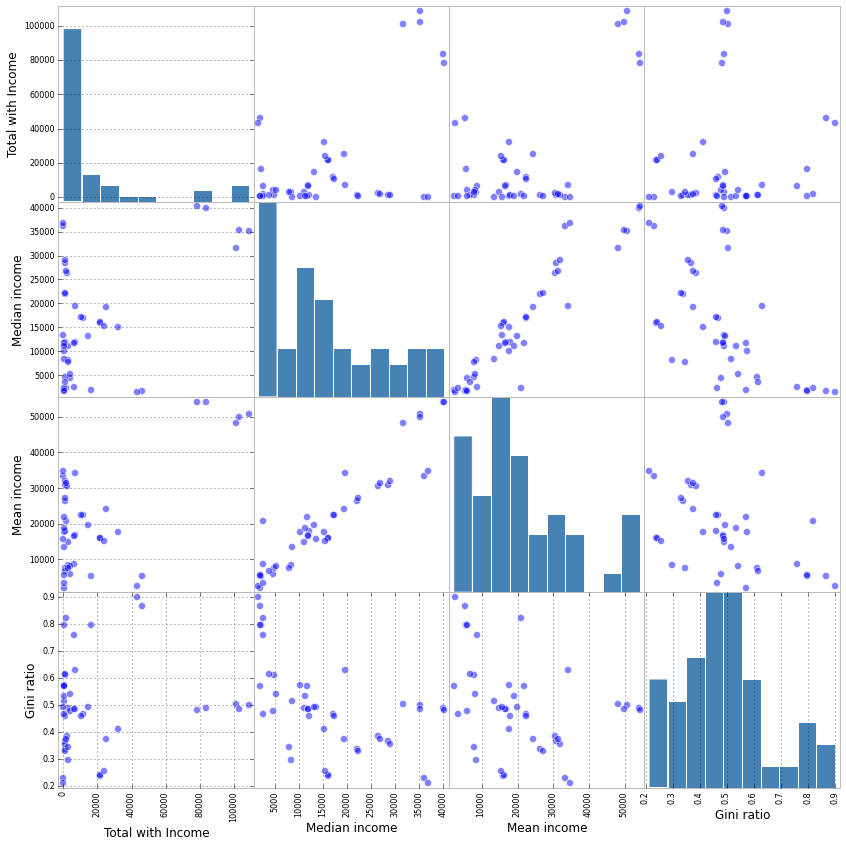

In [11]:
#Plotting the correlation matrix of the columns
scatter_matrix(allmales['all'][[u'Total with Income',u'Median income', 
                                u'Mean income', u'Gini ratio']], 
                                figsize=(14,14), s=200, diagonal='hist')

In [14]:
#print allmales['black'][['Gini ratio']] #gini ratio - a measure of the income distribution...read more on it

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109fddcd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bd7ee90>]], dtype=object)

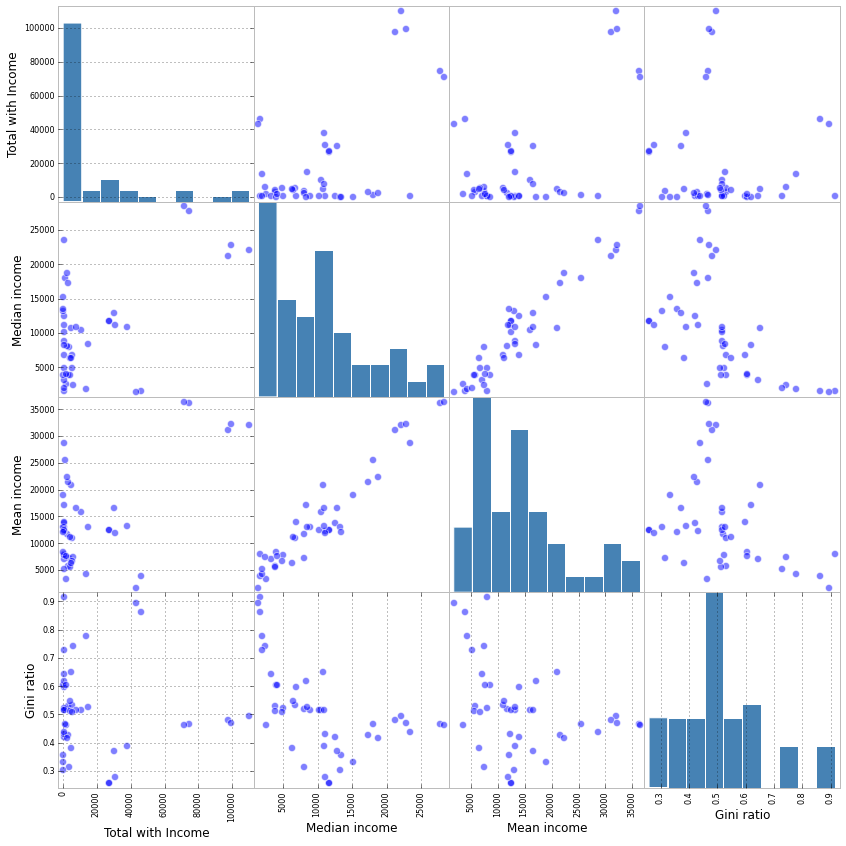

In [15]:
#Repeat both for females
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)
            
scatter_matrix(allfemales['all'][[u'Total with Income',u'Median income', 
                                u'Mean income', u'Gini ratio']], 
                                figsize=(14,14), s=200, diagonal='hist')

In [54]:
#Create an list that can be looped through to aggregate all the incomes by race for EACH gender 

MaleIncomebyRace = []
FemaleIncomebyRace = []

RaceList = ['all', 'asian', 'black', 'hispanic', 'white']

for i in RaceList:
    RaceIncomeMales = allmales[i]['Median income'][1]
    MaleIncomebyRace.append(RaceIncomeMales)
    
    RaceIncomeFemales = allfemales[i]['Median income'][1]
    FemaleIncomebyRace.append(RaceIncomeFemales)

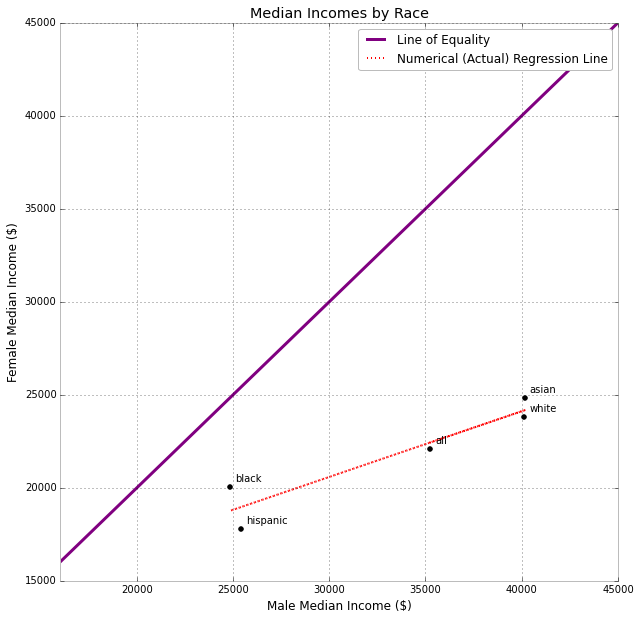

In [61]:
figure(figsize=(10, 10))   
scatter(MaleIncomebyRace, FemaleIncomebyRace, color = 'k')
plot([0,50000], [0,50000], linestyle='-', linewidth=3, color = 'purple', label = 'Line of Equality')
title('Median Incomes by Race')
xlabel('Male Median Income ($)')
ylabel('Female Median Income ($)')

#Plot the Regression Line for Income
x = MaleIncomebyRace
y = FemaleIncomebyRace
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 

plot(x, fit_fn(x), ':r', label = 'Numerical (Actual) Regression Line')
xlim(16000, 45000)
ylim(15000, 45000)
legend()

#Labeling the points on the regression line, nice!!
for label, x, y in zip(RaceList, MaleIncomebyRace, FemaleIncomebyRace):
    annotate(label, xy = (x+300, y+300))

In [56]:
#Now onto the analytics!! Yay... :/

#Calculate the predicted regression of race and income
cor = scistat.spearmanr(FemaleIncomebyRace, MaleIncomebyRace)
beta1 = cor[0] * np.std(FemaleIncomebyRace) / np.std(MaleIncomebyRace)
beta0 = np.mean(FemaleIncomebyRace) - (beta1 * np.mean(MaleIncomebyRace))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 18 Oct 2015   Prob (F-statistic):             0.0176
Time:                        19:21:58   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

//anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


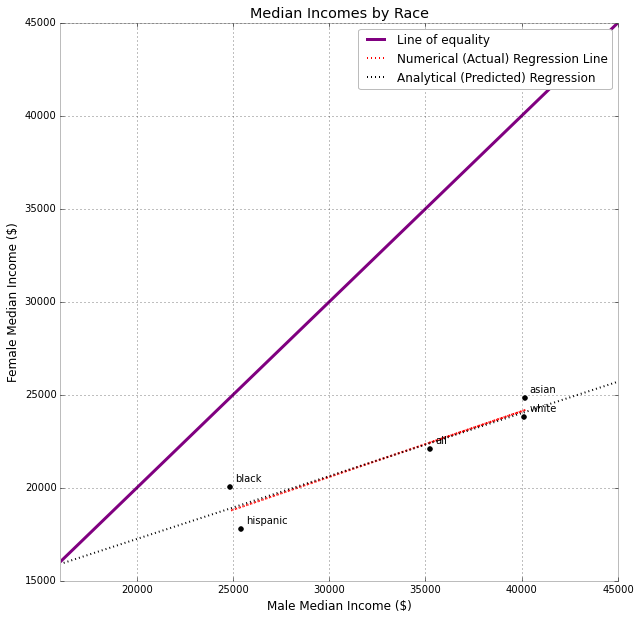

In [74]:
#Pay attention to the order in which you plot, it matters!!

#Replotting the old data
figure(figsize=(10, 10))   
scatter(MaleIncomebyRace, FemaleIncomebyRace, color = 'k')
plot([0,50000], [0,50000], linestyle='-', linewidth=3, color = 'purple', label = 'Line of equality')
title('Median Incomes by Race')
xlabel('Male Median Income ($)')
ylabel('Female Median Income ($)')

#Plot the Regression Line for Income
x = MaleIncomebyRace
y = FemaleIncomebyRace
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 

plot(x, fit_fn(x), ':r', label = 'Numerical (Actual) Regression Line')
xlim(16000, 45000)
ylim(15000, 45000)

#Labeling the points on the regression line, nice!!
for label, x, y in zip(RaceList, MaleIncomebyRace, FemaleIncomebyRace):
    annotate(label, xy = (x+300, y+300))
    
xlr = np.arange(1, 100000)
linem = beta1 * xlr + beta0
plot(xlr, linem, ':k', label = "Analytical (Predicted) Regression")
legend()

#Performing linear regression tables
Males = sm.add_constant(MaleIncomebyRace)
IncomeReg1=sm.OLS(FemaleIncomebyRace, Males).fit()
print IncomeReg1.summary()


### Are the fits similar? Are there any leverage points?

Although the regression line fits the analytic (predicted) regression well, you can see that the hispanic data point influences the lower end of the data regression.

In [47]:
#To unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!) 
#here ar a few lines of code that should do the trick. I used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1-dimensional after merging. 
#I also masked the NaN values. I used the numpy ma (masled array) package. Every array is associated by this package to a mask array of Bools [True or False] of the same size.

all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values, allmales['white']['Median income'][:].values, 
                                      allmales['black']['Median income'][:].values,
                                      allmales['hispanic']['Median income'][:].values,
                                      allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values, 
                                        allfemales['white']['Median income'][:].values, 
                                        allfemales['black']['Median income'][:].values,
                                        allfemales['hispanic']['Median income'][:].values, 
                                        allfemales['asian']['Median income'][:].values]).flatten())

In [48]:
#I am gonna create the mask int the next line. 
#the mask is True where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0,
#so I can add the male and female mask and the resulting mask will be 
#False where both arrays ARE NOT NaN, and true otherwise. 

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [51]:
#Redo the analytical (predicted) regression for males vs. females instead of race
cor1 = scistat.spearmanr(all_females, all_males)
beta3 = cor1[0] * np.std(all_females) / np.std(all_males)
beta2 = np.mean(all_females) - (beta3 * np.mean(all_females))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 18 Oct 2015   Prob (F-statistic):             0.0176
Time:                        19:27:45   Log-Likelihood:                -40.948
No. Observations:                   5   AIC:                             85.90
Df Residuals:                       3   BIC:                             85.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9989.8444   2508.397      3.983      0.0

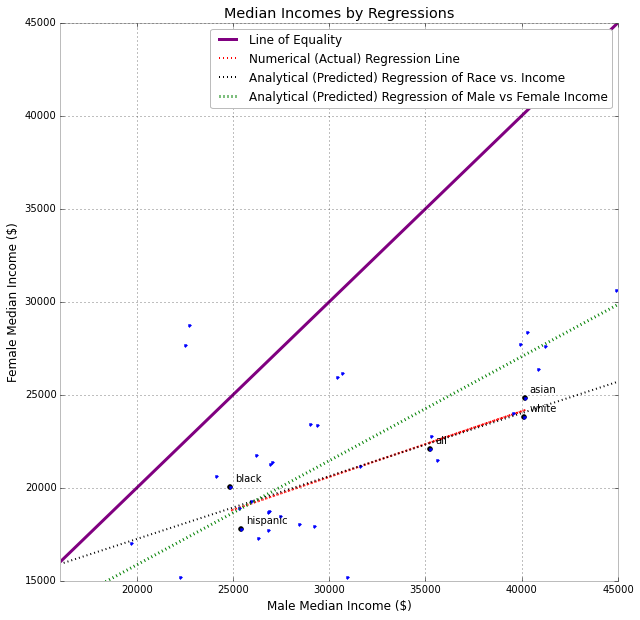

In [75]:
#Replotting the old data
figure(figsize=(10, 10))   
plot([0,50000], [0,50000], linestyle='-', linewidth=3, color = 'purple', label = 'Line of Equality')
title('Median Incomes by Regressions')
xlabel('Male Median Income ($)')
ylabel('Female Median Income ($)')

#Plot the Regression Line for Income
x = MaleIncomebyRace
y = FemaleIncomebyRace
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 

plot(x, fit_fn(x), ':r', label = 'Numerical (Actual) Regression Line')
xlim(16000, 45000)
ylim(15000, 45000)

#Labeling the points on the regression line, nice!!
scatter(MaleIncomebyRace, FemaleIncomebyRace, color = 'black')
for label, x, y in zip(RaceList, MaleIncomebyRace, FemaleIncomebyRace):
    annotate(label, xy = (x+300, y+300))

#Scatter plot of summed data
plot(all_males, all_females, 'b.')
    
xlr = np.arange(1, 100000)
linem = beta1 * xlr + beta0
plot(xlr, linem, ':k', label = "Analytical (Predicted) Regression of Race vs. Income")

xlr1 = np.arange (1, 100000, 1)
linem1 = beta3 * xlr1 + beta2
plot(xlr1, linem1, ':g', linewidth=3, label = "Analytical (Predicted) Regression of Male vs Female Income")

legend()

#Performing linear regression tables
MalesRace = sm.add_constant(MaleIncomebyRace)
IncomeReg1=sm.OLS(FemaleIncomebyRace, MalesRace).fit()
print IncomeReg1.summary()

AllMales = sm.add_constant(all_males.mask)
IncomeReg2=sm.OLS(all_females.mask, AllMales).fit()
print IncomeReg2.summary()